In [ ]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

Load train & test files

In [ ]:
# upload folder
from google.colab import files
uploaded = files.upload()

Saving train_data.zip to train_data.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("train_data.zip", 'r') as zip_ref:
    zip_ref.extractall("train_data")


In [ ]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)

folder = 'train_data/train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


Set key parameters

In [ ]:
img_width, img_height = 48,48
train_data_dir = 'train_data/train_data/train'
validation_data_dir = 'train_data/train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

Build model on top of a pretrained VGG

In [ ]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [ ]:
for layer in model.layers[:10]:
    layer.traiable = False

In [ ]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy',
                    optimizer = optimizers.SGD(learning_rate = 0.0001, momentum=0.9),
                    metrics=['accuracy'])

Data Augumentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [ ]:
history = model_final.fit(
    train_generator,
    steps_per_epoch=nb_train_sample // batch_size,
    validation_steps=nb_validation_sample // batch_size,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 543ms/step - accuracy: 0.6172 - loss: 0.6711 - val_accuracy: 0.7688 - val_loss: 0.4790
Epoch 2/15
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6250 - loss: 0.6243

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.6250 - loss: 0.6243 - val_accuracy: 0.7688 - val_loss: 0.4832
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.7758 - loss: 0.4114 - val_accuracy: 0.8500 - val_loss: 0.3266
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8438 - loss: 0.3016 - val_accuracy: 0.8750 - val_loss: 0.3186
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9021 - loss: 0.2876 - val_accuracy: 0.8813 - val_loss: 0.2684
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9375 - loss: 0.2243 - val_accuracy: 0.9000 - val_loss: 0.2557
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9545 - loss: 0.1831 - val_accuracy: 0.9312 - val_loss: 0.2259
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9375 - loss: 0.1999 - val_accuracy: 0.9312 - val_loss: 0.1917
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.9644 - loss: 0.1737 - val_accuracy: 0.9062 - val_loss: 0

In [ ]:
history.history

{'accuracy': [0.7149999737739563,
  0.625,
  0.7975000143051147,
  0.84375,
  0.9225000143051147,
  0.9375,
  0.9474999904632568,
  0.9375,
  0.9700000286102295,
  0.96875,
  0.9599999785423279,
  1.0,
  0.9750000238418579,
  1.0,
  0.9624999761581421],
 'loss': [0.5757035613059998,
  0.6242532730102539,
  0.3620283007621765,
  0.3016464114189148,
  0.26107513904571533,
  0.22433391213417053,
  0.1828201711177826,
  0.19994628429412842,
  0.13953502476215363,
  0.08079496771097183,
  0.12204038351774216,
  0.06014677882194519,
  0.08116953819990158,
  0.06255050003528595,
  0.08561521768569946],
 'val_accuracy': [0.768750011920929,
  0.768750011920929,
  0.8500000238418579,
  0.875,
  0.8812500238418579,
  0.8999999761581421,
  0.9312499761581421,
  0.9312499761581421,
  0.90625,
  0.925000011920929,
  0.9125000238418579,
  0.9312499761581421,
  0.925000011920929,
  0.9375,
  0.9312499761581421],
 'val_loss': [0.47896304726600647,
  0.48320311307907104,
  0.32664135098457336,
  0.31861

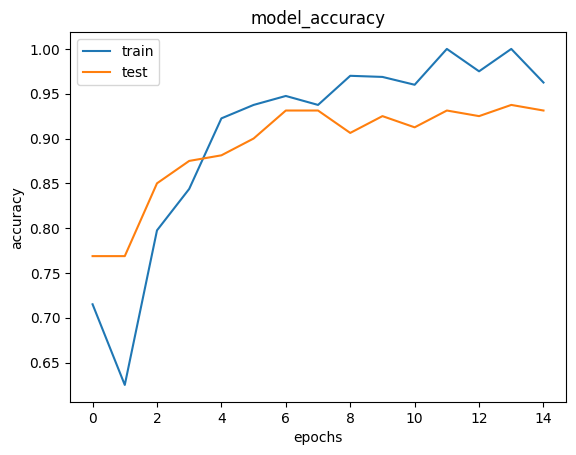

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

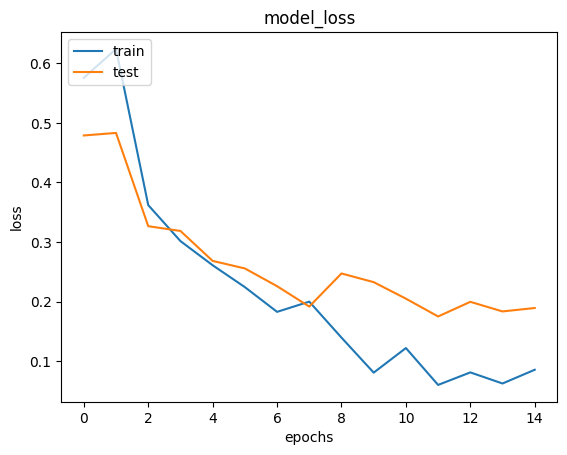

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
model_final.save('model_final.h5')

In [ ]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [ ]:
class_dictionary

{0: 'no_car', 1: 'car'}

Predictive System

In [ ]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)

    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [ ]:
# uploade image
from google.colab import files
uploaded = files.upload()

Saving roi_1.png to roi_1.png


In [ ]:
make_prediction("roi_1.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'car'

In [ ]:
model_final.save("model_final.h5")